# Лабораторная работа №3
## Цыпаев Владимир Николаевич
## Вариант 11
## Группа РИМ-181228

In [116]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from math import factorial as fact
%matplotlib inline

In [117]:
def create_linspace(start, stop, nsamples):
    return np.linspace(start, stop, num = nsamples)

def plot(X, t = [], title = '', f_dict = {}):
    plt.figure(figsize = (10, 6))
    plt.title(title)
    if len(t) > 0:
        plt.plot(t, X)
    else:
        plt.plot(X)
    if len(f_dict) > 0:
        legend_labels = []
        for f in f_dict["functions"]:
            plt.plot(t, f)
        for label in f_dict["titles"]:
            legend_labels.append(label)
        plt.legend(['Origin', *legend_labels])
    plt.show()

In [118]:
X = [18.47, 14.87, 21.51, 9.07, 16.02, 11.12, 23.45, 6.45, 14.21, 8.18, 14.50, 3.86, 10.14, 9.99, 14.47, 0.65, 8.97, 2.47, 12.58, 3.12, 6.81, 0.43, 4.65, 5.91]
X = np.asarray(X);
X.size == 24

True

In [119]:
t = create_linspace(0, 1, X.size)

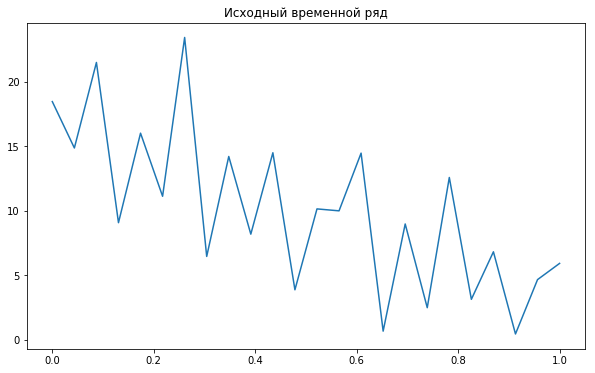

In [120]:
plot(X, t, title = 'Исходный временной ряд')

# Рассчитать регрессионную модель тренда первого порядка

In [121]:
def regression_model(A, t, rate = 1):
    rate += 1
    Y = A.transpose()
    X = np.ones((A.size, 1), dtype = float)
    
    for i in range(1, rate):
        X = np.concatenate((X, t.reshape(-1,1)**i), axis=1)
            
    B = np.linalg.lstsq(X,Y, rcond=None)
    B = B[0]
    return B


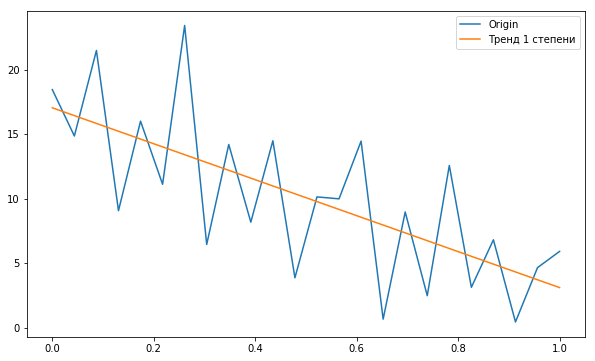

In [122]:
plot(X, t = t, f_dict = {"functions": [T], "titles": ['Тренд 1 степени'] })

# Проверка

### На основе линейной регресии из numpy

In [123]:
bb = np.polyfit(t, X, 1)
T_numpy = bb[1]+bb[0]*t

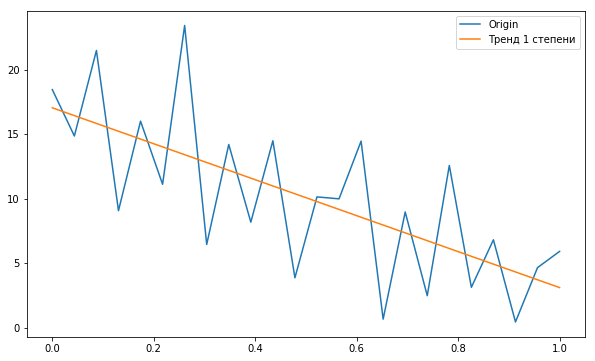

In [124]:
plot(X, t = t, f_dict = {"functions": [T_numpy], "titles": ['Тренд 1 степени'] })

### На основе линейной регресии из scipy stats

In [125]:
out = stats.linregress(t, X)
T_scipy = out.intercept + out.slope*t

In [126]:
print(out)

LinregressResult(slope=-13.9578, intercept=17.05806666666667, rvalue=-0.6841189524167703, pvalue=0.00022741475926521282, stderr=3.172650078786541)


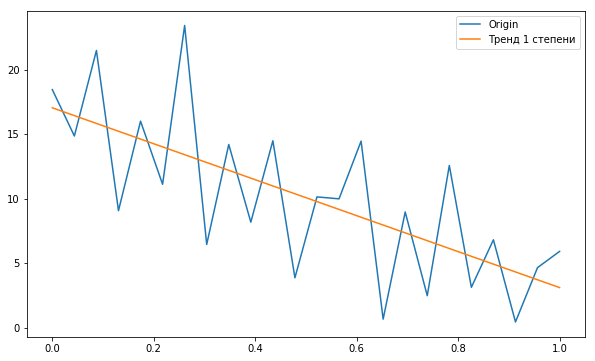

In [127]:
plot(X, t = t, f_dict = {"functions": [T_scipy], "titles": ['Тренд 1 степени'] })

### На основе подгонки кривых curve_fit из scipy.optimize

In [128]:
from scipy.optimize import curve_fit

def func(t, b0, b1):
    return b0 + b1 * t
popt, pcov = curve_fit(func, t, X)

In [159]:
print(popt, '\n', pcov)
T_curve = 

[18.55795039  1.38694779] 
 [[5.87543233 0.63052675]
 [0.63052675 0.12217715]]


### На основе библиотеки sklearn

In [130]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(t.reshape(-1,1), X)
print(reg.coef_, reg.intercept_)
print( reg.score(t.reshape(-1,1), X))

[-13.9578] 17.05806666666667
0.4680187410558193


In [131]:
yfit = reg.predict(t[:, np.newaxis])

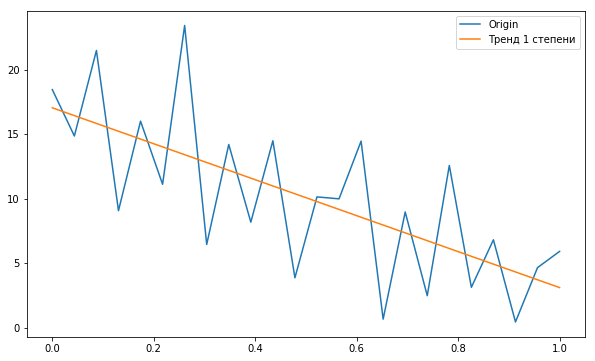

In [132]:
plot(X, t = t, f_dict = {"functions": [yfit], "titles": ['Тренд 1 степени'] })

### На основе statsmodel

In [133]:
import statsmodels.api as sm
x_ = sm.add_constant(t.reshape(-1,1)) # создаем простую модель
smm = sm.OLS(X, x_)
res = smm.fit()

In [134]:
print(res.params)

[ 17.05806667 -13.9578    ]


# Рассчитать регрессионную модель тренда 2 и 3 порядка

### Матричный

In [135]:
B = regression_model(X, t)
T = B[0]+B[1]*t

B2 = regression_model(X, t, 2)
T2 = B2[0] + B2[1]*t + B2[2]*t**2

B3 = regression_model(X, t, 3)
T3 = B3[0] + B3[1]*t + B3[2]*t**2 + B3[3]*t**3

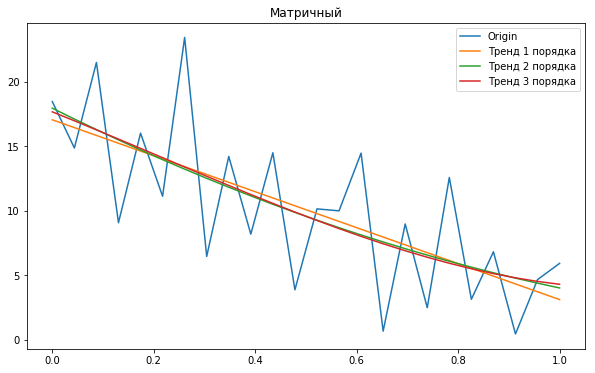

In [136]:
plot(X, t = t, title='Матричный', f_dict = {"functions": [T, T2, T3], "titles": ['Тренд 1 порядка', 'Тренд 2 порядка', 'Тренд 3 порядка'] })

### curve_fit

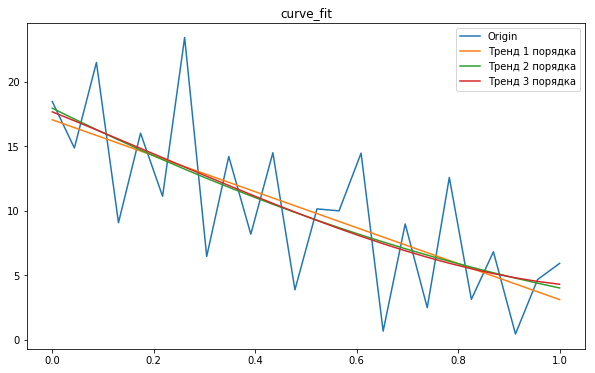

In [137]:
def func_2(t, b0, b1, b2):
    return b0 + b1 * t + b2 * t**2
popt_2, pcov = curve_fit(func_2, t, X)
def func_3(t, b0, b1, b2, b3):
    return b0 + b1 * t + b2 * t**2 + b3*t**3
popt_3, pcov = curve_fit(func_3, t, X)

plot(X, t = t, title='curve_fit', f_dict = {"functions": [func(t, *popt), func_2(t, *popt_2), func_3(t, *popt_3)], "titles": ['Тренд 1 порядка', 'Тренд 2 порядка', 'Тренд 3 порядка'] })

### polyfit

In [138]:
bb2 = np.polyfit(t, X, 2)
bb3 = np.polyfit(t, X, 3)
bb4 = np.polyfit(t, X, 4)

T1_polyfit = bb[1]+bb[0]*t
T2_polyfit = bb2[2]+(bb2[1])*t+(bb2[0])*(t**2)
T3_polyfit = bb3[3]+bb3[2]*t+bb3[1]*t**2+bb3[0]*t**3

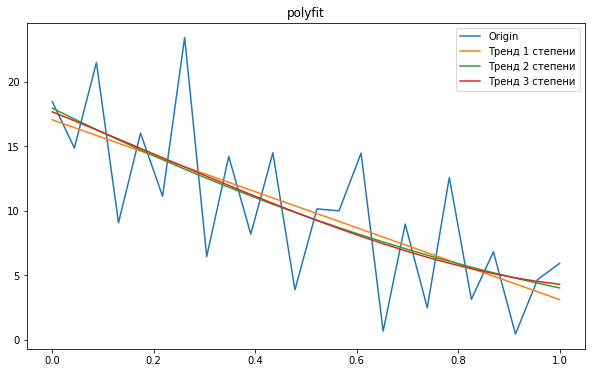

In [139]:
plot(X, t = t, title='polyfit', f_dict = {"functions": [T1_polyfit, T2_polyfit, T3_polyfit], "titles": ['Тренд 1 степени', 'Тренд 2 степени', 'Тренд 3 степени'] })

In [160]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def linear_regression(X, degree = 1):
    yfit = reg.predict(t[:, np.newaxis])
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(yfit.reshape(-1, 1), X)
    y_plot = model.predict(yfit.reshape(-1, 1))
    return y_plot

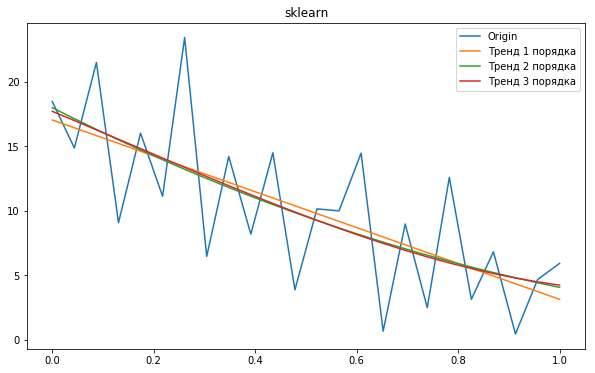

In [161]:
plot(X, t = t, title='sklearn', f_dict = {"functions": [linear_regression(X, 1), linear_regression(X, 2), linear_regression(X, 3)], "titles": ['Тренд 1 порядка', 'Тренд 2 порядка', 'Тренд 3 порядка'] })

# Экспоненциальный тренд

### curve_fit

In [162]:
def func_exp(x, a, b):
    return a * np.exp(-b * x)

popt, pcov = curve_fit(func_exp, t, X)

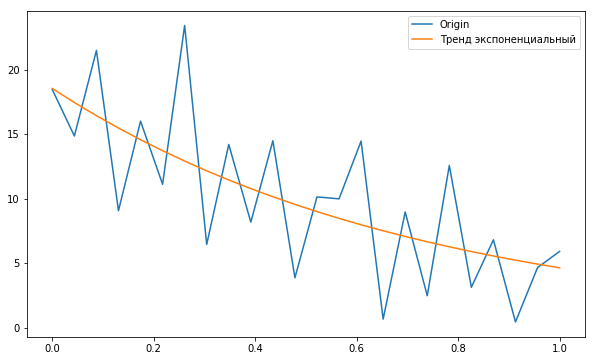

In [163]:
plot(X, t = t, f_dict = {"functions": [func_exp(t, *popt)], "titles": ['Тренд экспоненциальный'] })

### Матричный

In [164]:
def regression_model_exp(A, t):
    Y = A.transpose()
    X = np.zeros((A.size, 1), dtype = float)
    
    for i in range(0, A.size):
        X[i] = t.reshape(-1,1)[i]
    
    X = np.concatenate((X, -1*np.log(t.reshape(-1,1))), axis=1)
    X[0] = 1.0
#     print(X)
    B = np.linalg.lstsq(X, Y, rcond=None)
    B = B[0]
    return B

In [179]:
def func_exp_matrix(x, a, b):
    return np.log(a) * np.exp(-b * x)

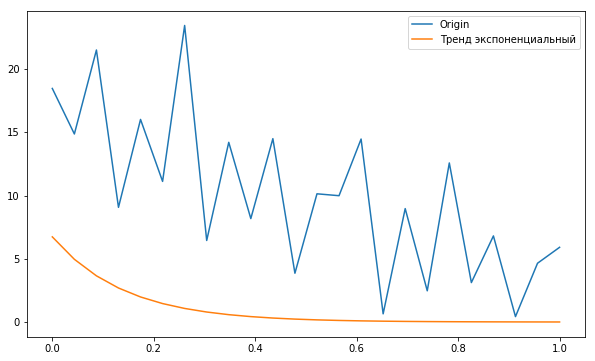

In [180]:
plot(X, t = t, f_dict = {"functions": [func_exp(t, B_exp[0], B_exp[1])], "titles": ['Тренд экспоненциальный'] })

# Тренд методом сглаживания

In [168]:
def smooth(x, window_len): 
    if window_len<3:
        return x
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

In [169]:
smooth_3 = smooth(X, 3)
smooth_7 = smooth(X, 7)
smooth_11 = smooth(X, 11)

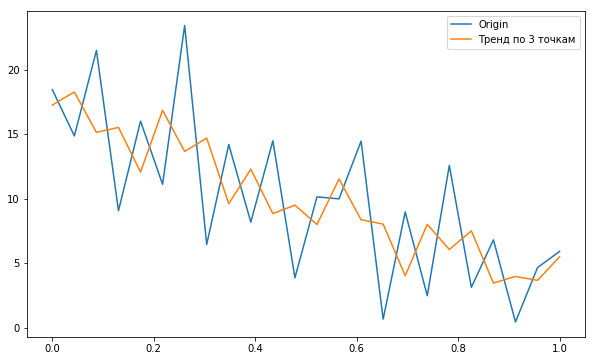

In [170]:
plot(X, t = t, f_dict = {"functions": [smooth_3], "titles": ['Тренд по 3 точкам'] })

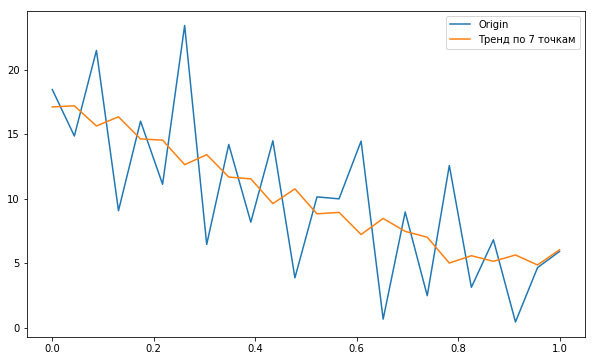

In [171]:
plot(X, t = t, f_dict = {"functions": [smooth_7], "titles": ['Тренд по 7 точкам'] })

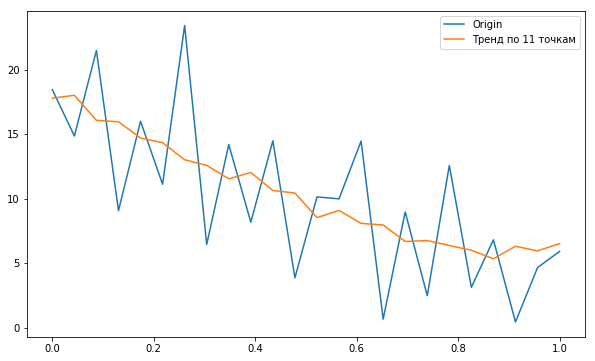

In [172]:
plot(X, t = t, f_dict = {"functions": [smooth_11], "titles": ['Тренд по 11 точкам'] })

# Собственная функция сглаживания

In [173]:
def smooth_three(X): 
    smooth_data = list() 
    for index, x in enumerate(X): 
        if index == 0 or index + 1 == len(X): 
            smooth_data.append(x) 
            continue 

        smooth_x = (1/3) * (X[index-1] + x + X[index+1]) 
        smooth_data.append(smooth_x) 
    return smooth_data

In [174]:
def smooth_seven(data): 
    smooth_data = list() 
    for index, x in enumerate(data): 
        a = np.arange(0, 7) 
        b = np.arange(len(X) - 7, len(data)) 
        skip_list = np.concatenate((a, b), axis=None) 
        if index in skip_list: 
            smooth_data.append(x) 
            continue 

        smooth_x = (1/7) * (data[index-3] + data[index-2] + data[index-1] + x + data[index+1] + data[index+2] + data[index+3]) 
        smooth_data.append(smooth_x) 
    return smooth_data

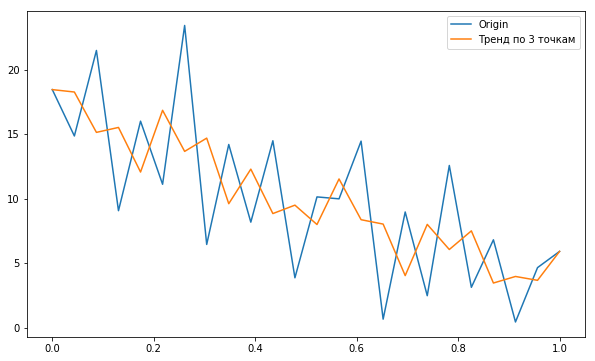

In [175]:
plot(X, t = t, f_dict = {"functions": [smooth_three(X)], "titles": ['Тренд по 3 точкам'] })

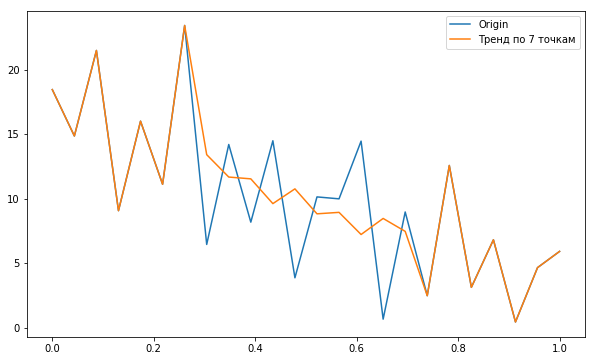

In [176]:
plot(X, t = t, f_dict = {"functions": [smooth_seven(X)], "titles": ['Тренд по 7 точкам'] })

In [177]:
def smooth_exp(data, alpha): 

    smooth_data = [(data[0] + data[1]) / 2] 

    for i in range(1, len(data)): 
        w1 = smooth_data[i-1] 
        smoothed_x = (1 - alpha) * w1 + alpha * data[i] 
        smooth_data.append(smoothed_x) 

    return smooth_data

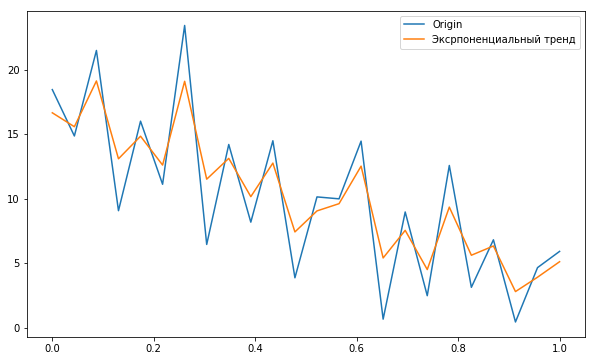

In [178]:
plot(X, t = t, f_dict = {"functions": [smooth_exp(X, 0.6)], "titles": ['Эксрпоненциальный тренд'] })